## Predictive Modeling:

- Data Cleaning: Ensure there are no missing values or irrelevant features.

- Feature Selection: Use only relevant features for training the model.

- Class Imbalance: Handle class imbalance using techniques like SMOTE.

- Model Training: Train a variety of models (Logistic Regression, Random Forest, XGBoost) and evaluate using appropriate metrics.

- Model Evaluation: Use metrics like ROC AUC, F1-score, MAPE, and cross-validation to evaluate the models.

- Hyperparameter Tuning: Use GridSearchCV or RandomizedSearchCV to find the best hyperparameters.

- Interpretation: Use SHAP to understand which features are most important.

- Reporting: Summarize the model performance and feature importance in a report.

### TASK 1


- Step 1: Start with data cleaning and splitting.

- Step 2: Experiment with different models (Logistic Regression, Random Forest, etc.).

- Step 3: Evaluate the model using metrics and visualizations.

- Step 4: Try hyperparameter tuning to improve performance.

- Step 5: Use SHAP for model interpretation.

- Step 6: Report findings and recommendations.

# End to End model pipeline deployment + MLOps (To make the model publicly accessible for consumption)

STEP 1 
- ETL ---- extract, transform and load the raw data
   i - loaded the raw CSV
   ii - uploaded these CSV to AWS S3 bucket (data lake--- store structured & unstructed data)
   iii - Data modelling ---- define the structure of your data in a database 
     i- Define relationships through primary or secondary keys
     ii - schema design
        - star schema
        - snowflake schema  ----- fact tables & dimensional tables 
          -- fct_patients 
          --- dim_dropout_flag 
          ---- dim_clinics
          ---- dim_home_adherences
          --- dim_feedbacks 

        - define the behavior or your data
          - SCD1 & SCD2 ---- slow changing dimension tables 

    iii - loaded the data to our postgres (well-structured)
    iv - Retrieve our data for use 

STEP 2 
 - Performed Exploratory data analysis (EDA)
   i - data cleaning 
      - missing values 
      - duplicates
      - outliers 
         - IQR 
         - Z-score
   ii - data distribution 
     - Univariate analysis
     - handle skewnesss (eg log transforms)
  iii - Correlation analysis
     - Multivariate analysis
     - checked for relationship between features 

  iv - Problem analysis (Dropout)
    -- exploreeeeee lagrangeeeeeee !!!!!!!

STEP 3 (CLUSTERING)
  - K-means
    - elbow
       - sharp bend --- all k after the sharp means that the more cluster the more insignificant (e.g -- silhoutee reduces)
    - silhoutee  (how well your k is formated e.g how well is the pizza cut)
    - choose your optima K (e.g 2,3)
    - implement k on the algorithm
  - DBSCAN / HBSCAN   
    - Auto-scan 
    - core points
    - border points
    - Outliers 
    - outputs your elbow and silhoutee (Business KPI e.g 0.65---- 0.01)
    - optimzing and productionized the clustering model

STEP 4 (PREDICTION)
 - Same process
   - data loading 
   - feature engineering 
     - defined the session features
     - defined the patient features
     - joined the both in one (X_RAW)
    - Data pipeline 
      - num col
      - cat col
      - columner transformer
      - fit transform the data using the preprocessor
    - define multiple candididate model
       - XGboost
       - Gradient boost
       - Logistic regression 
       - Random forest 
    - CV - cross validation to choose the best model
    - prediction 
      - take the selected model and run it through
       -- training data 
       -- test data
    - saved the model 
       - preprocessor.pkl
       - features_names.pkl
       - model.pkl
       - columns.pkl

  

BUFFER POINT : tracking - MLFLOW
STEP 5 (DEPLOYMENT + MLOPS)     

1 - Localize stage   - (trying to make sure our endpoint works locally before push to the cloud)
  i - Implement our Endpoints (FastAPI) - API centric (asynchronouse & Asynchronous)
        - flask - lightweight RESTFUL API - web application & scripts
        - Django - complex -- web development (scalability, more secured)
 ii - make requests locally via:
    - Swagger UI
    - Postman
 iii - Test our endpoints 
     - write test cases
      - pytest
 
2 - Containeralized stage 
   - Dockerfile --- multi-stage
     - yaml file -- markuup language use in writing IAC---(infrastructure as code)
   - Dockercompose - easier way to run your containerrizlied apps
   - secret management -- all your crendentials  (data governance)
      - IAM rules --- role based managements (resources, users,, groups policies(read and write access, upload acces insituation IAC like aws cdK or SAM))
      - aws secrets managament
      - policy management (resources)
      - s3 lake formation (storage RBA--role based access)
    - CI-CD (continious integration & continious development)
      - github actions 
        - step 1 
        - step 2
        - step 3
      - terraform (IAC)
        - provision aws lambda 
        - managed dependencies with versioning

3 - Cloud Stage (AWS)
  - API-- fastAPI- Dockerized- VMachine (linux, ubuntu)-- 
     - EC2 instance 
     - Lambda - serverless resource (pay-as-you-go)
     - Kubernetes cluster
     - API gateway
4 - MLOps ---- (Machine learning operations)
   - EXperiments
   - model registery - hugging face
   - monitoring & tracking - MLFLOW - drift


  



# Project structure 

#### 1 - implement our endpoints using FASTAPI

medoptix-ai/
‚îú‚îÄ‚îÄ app/
‚îÇ   ‚îú‚îÄ‚îÄ main.py                
‚îÇ   ‚îú‚îÄ‚îÄ models.py              
‚îÇ   ‚îú‚îÄ‚îÄ prediction.py          
‚îÇ   ‚îî‚îÄ‚îÄ database.py            
‚îú‚îÄ‚îÄ models/                 
‚îÇ   ‚îú‚îÄ‚îÄ clustering_results.pkl
‚îÇ   ‚îú‚îÄ‚îÄ medoptix_clustering_*.pkl
‚îÇ   ‚îî‚îÄ‚îÄ medoptix_prediction_*.pkl
‚îú‚îÄ‚îÄ notebooks/
‚îÇ   ‚îú‚îÄ‚îÄ 01_eda.ipynb
‚îÇ   ‚îú‚îÄ‚îÄ 02_feature_engineering.ipynb
‚îÇ   ‚îú‚îÄ‚îÄ 03_patient_segmentation.ipynb
‚îÇ   ‚îú‚îÄ‚îÄ 04_dropout_prediction.ipynb
‚îÇ   ‚îî‚îÄ‚îÄ 05_adherence_forecasting.ipynb
‚îú‚îÄ‚îÄ tests/
‚îÇ   ‚îú‚îÄ‚îÄ test_api.py
‚îÇ   ‚îî‚îÄ‚îÄ test_prediction.py
‚îú‚îÄ‚îÄ requirements.txt
‚îú‚îÄ‚îÄ Dockerfile
‚îú‚îÄ‚îÄ docker-compose.yml
‚îî‚îÄ‚îÄ .env

### CLUSTERING PIPELINE

In [1]:
# step 1: Predictions # importing my libraries
import os
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold      import TSNE
import joblib
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier 

c:\Users\Muham\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# step 2 

patients = pd.read_csv('C:/Users/Muham/Downloads/EX-ROLES/AMDARI/medoptix-ai-internship/medoptix_data/raw/patients.csv')
sessions = pd.read_csv('C:/Users/Muham/Downloads/EX-ROLES/AMDARI/medoptix-ai-internship/medoptix_data/raw/sessions.csv')
dropout_flag = pd.read_csv('C:/Users/Muham/Downloads/EX-ROLES/AMDARI/medoptix-ai-internship/medoptix_data/raw/dropout_flags.csv')



In [3]:
# Clustering patients based on their data

#clustering pipeline (moduralized/optimized for production)
class MedOptixClustering:
    def __init__(self):
        self.preproc = None
        self.pca = None
        self.kmeans = None
        self.num_col = None
        self.cat_col = None

    # step 1 - loads our data
    def load_data(self):
        """ loading our data"""
        return patients, sessions, dropout_flag

    #step 2 - Defined the session features
    def create_session_features(self, sessions):
        sess_agg = (
            sessions
            .sort_values(['patient_id', 'date'])    
            .assign(pain_delta=lambda d: d.groupby("patient_id")["pain_level"].diff())
            .groupby("patient_id") 
            .agg (
                n_sessions = ("session_id", "count"),          
                avg_session_duration = ("duration", "mean"),
                first_week = ("week", "min"),
                last_week = ("week", "max"),
                mean_pain = ("pain_level", "mean"),
                mean_pain_delta = ("pain_delta", "mean"),
                home_adherence_mean = ("home_adherence_pc", "mean"),
                satisfaction_mean = ("satisfaction", "mean")
            ))
        return sess_agg

    # step 3 prepare the patient data
    def prepare_patient(self, patients, sessions):
        # combining the patient and session data

        pat_sel = patients[
            [
                "patient_id",
                "age",
                "gender",
                "bmi",
                "smoker",
                "chronic_cond",
                "injury_type",
                "referral_source",
                "insurance_type"
            ]
        ].set_index("patient_id")

        #step 3a : calling session features 
        sess_agg = self.create_session_features(sessions)

        #step 3b : join the patient and session data
        X_raw = (
            pat_sel
            .join(sess_agg, how="left")
            .reset_index()
        )

        return X_raw
    
    # step 4 - define the numerical and categorical columns
    def setup_preprocessing(self):
        """ step 4a : Define the pipelines for numerical and categorical features"""
        self.num_col = [
            "age", "bmi",
            "n_sessions", "avg_session_duration",
            "mean_pain", "mean_pain_delta"
        ]

        self.cat_col = [
            "gender", "smoker",
            "chronic_cond", "injury_type"
        ]

        #step 4b : Define the numerical and categorical pipelines
        numeric_pipe = Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", RobustScaler())
        ])

        # step 4c : Define the categorical pipeline
        categorical_pipe = Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
        ])

        # step 4d : column transformer
        self.preproc = ColumnTransformer(
            transformers=[
                ("num", numeric_pipe, self.num_col),
                ("cat", categorical_pipe, self.cat_col)
            ])

        return self.preproc


    # step 7 - fit the KMeans model
    def find_optimal_k (self, X_reduced , k_range=range(2,11)):
        """ Find optimal number of clusters using elbow and silhouette methods"""
        wcss, sils = [], []
    
        for k in k_range:                    
            kmeans = KMeans(
                n_clusters= k,
                init = "k-means++",          
                n_init= "auto",
                random_state= 42,
                algorithm = "lloyd",
            )
            preds = kmeans.fit_predict(X_reduced)           
            wcss.append(kmeans.inertia_)            
            sils.append(silhouette_score(X_reduced, preds))
        
        # step 7a : Plot the elbow method
        fig , (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))

        ax1.plot(k_range, wcss, marker="o")
        ax1.set_title("Elbow Method")
        ax1.set_xlabel("Number of clusters (k)")
        ax1.set_ylabel("WCSS")

        ax2.plot(k_range, sils, marker="o")
        ax2.set_title("Silhouette Method")
        ax2.set_xlabel("Number of clusters (k)")
        ax2.set_ylabel("Silhouette Score")

        plt.tight_layout()
        plt.show()

        return wcss, sils

    # step 8 - fit the Kmeans model
    def perform_clustering(self, X_raw, k_opt=3):
        """ complete our clustering process"""
        print(f"Performing clustering with k={k_opt}...")

        #step 8a : Preprocessing
        print("Preprocessing data...")
        self.setup_preprocessing()

        # step 8b : Fit the preprocessor (model the data)
        X_clean = self.preproc.fit_transform(X_raw)

        # step 8c : Fit the PCA model for dimensionality reduction
        print("Fitting PCA...")
        self.pca = PCA(n_components=0.95, random_state=42)
        X_reduced = self.pca.fit_transform(X_clean)
        print(f"Reduced data shape: {X_reduced.shape}")

        # step 8d : Find optimal number of clusters
        print("Finding optimal number of clusters...")
        wcss, sils = self.find_optimal_k(X_reduced)

        # step 8e : Final clustering with KMeans
        print("Fitting KMeans...")
        self.kmeans = KMeans(
            n_clusters=k_opt, 
            init="k-means++",
            n_init="auto",
            random_state=42, 
            algorithm="lloyd"
        )
        clusters = self.kmeans.fit_predict(X_reduced)


        # step 8f : Evaluate the clustering 
        sil_score = silhouette_score(X_reduced, clusters)
        print(f"Silhouette Score: {sil_score:.3f}")

        # step 8g : Visualize the clusters
        self.visualize_clusters(X_reduced, clusters)
        return clusters, X_reduced, X_clean
    

    # step 9 - visualize the clusters
    def visualize_clusters(self, X_reduced, clusters):
        """ visualize clusters using PCA AND T-SNE"""
        
        # step 9a : PCA visualization
        pca2  = PCA(n_components=2, random_state=42)
        X_pca2d = pca2.fit_transform(X_reduced)

        # step 9b tsne visualization
        tsne2 = TSNE(n_components=2, perplexity=40,
             init="pca", random_state=42)
        X_tsne2d = tsne2.fit_transform(X_reduced)

        # step 9c plotting the PCA clusters
        fig , (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

        scatter1 = ax1.scatter(X_pca2d[:, 0], X_pca2d[:, 1], c=clusters, cmap="viridis", s=50)
        ax1.set_title("PCA Clusters")
        ax1.set_xlabel("PCA Component 1") 
        ax1.set_ylabel("PCA Component 2")
        plt.colorbar(scatter1, ax=ax1, label="Cluster")

        scatter2 = ax2.scatter(X_tsne2d[:, 0], X_tsne2d[:, 1], c=clusters, cmap="viridis", s=50)
        ax2.set_title("t-SNE Clusters")
        ax2.set_xlabel("t-SNE Component 1")
        ax2.set_ylabel("t-SNE Component 2")
        plt.colorbar(scatter2, ax=ax2, label="Cluster")

        plt.tight_layout()
        plt.show()

    # step 10 save the model
    def save_models(self, filepath_prefix="medoptix_clustering"):
        """ saving our trained model """
        joblib.dump(self.preproc, f"{filepath_prefix}_preproc.pkl")
        joblib.dump(self.pca, f"{filepath_prefix}_pca.pkl")
        joblib.dump(self.kmeans, f"{filepath_prefix}_kmeans.pkl")
        print(f"Models saved with prefix: {filepath_prefix}")

 


Raw data shape: (5000, 17)
feature columns: ['patient_id', 'age', 'gender', 'bmi', 'smoker', 'chronic_cond', 'injury_type', 'referral_source', 'insurance_type', 'n_sessions', 'avg_session_duration', 'first_week', 'last_week', 'mean_pain', 'mean_pain_delta', 'home_adherence_mean', 'satisfaction_mean']
Performing clustering with k=3...
Preprocessing data...
Fitting PCA...
Reduced data shape: (5000, 13)
Finding optimal number of clusters...


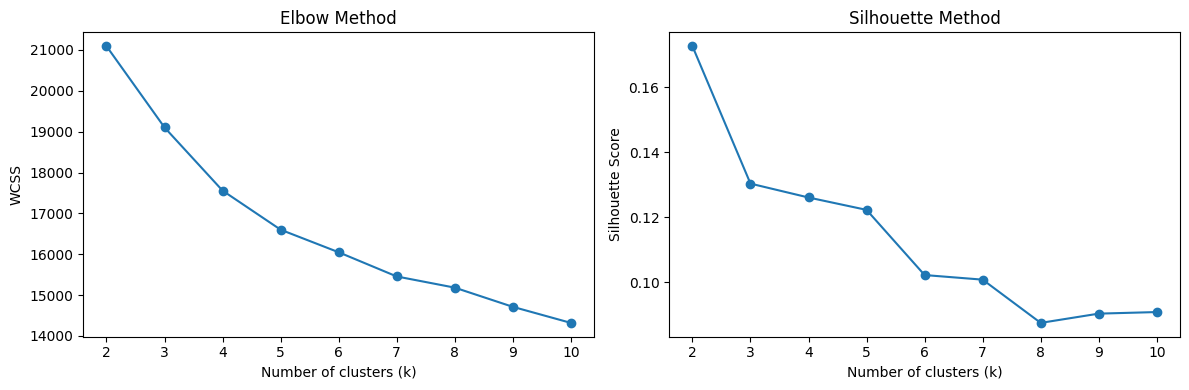

Fitting KMeans...
Silhouette Score: 0.130


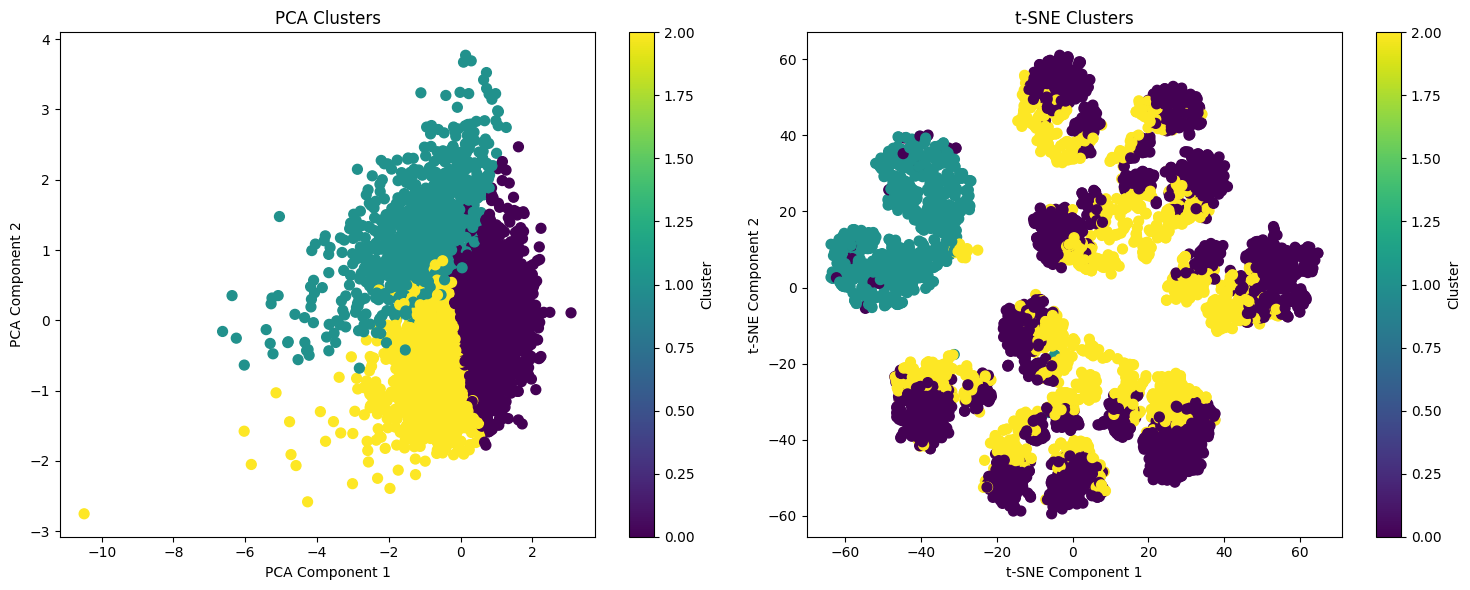

Models saved with prefix: medoptix_clustering
Clustering completed and results saved.
cluster distribution:  0    2634
2    1506
1     860
Name: count, dtype: int64
 file saved as: clustering_results.pkl, medoptix_clustering_*.pkl


In [4]:
# call the classes and methods


if __name__ == "__main__":
    clustering = MedOptixClustering()


    #loading the data
    patients, sessions, dropout_flag = clustering.load_data()

    # prepare features 
    X_raw = clustering.prepare_patient(patients, sessions)
    print(f"Raw data shape: {X_raw.shape}")
    print(f"feature columns: {X_raw.columns.tolist()}")

    # step 4 : perform clustering
    clusters, X_reduced, X_clean = clustering.perform_clustering(X_raw, k_opt=3)

    #create labels
    label = dropout_flag.set_index("patient_id")["dropout"]


    # save results for prediction 

    results = {
        'X_raw' : X_raw,
        "clusters": clusters,
        'label': label,
        "X_reduced": X_reduced,
        "X_clean": X_clean
    }

    joblib.dump(results, "medoptix_clustering_results.pkl")

    #save the model
    clustering.save_models()


    print("Clustering completed and results saved.")
    print("cluster distribution: ", pd.Series(clusters).value_counts())
    print(f" file saved as: clustering_results.pkl, medoptix_clustering_*.pkl")

### 2 - PREDICTION PIPELINE 

In [ ]:
import pandas as pd
import numpy as np
import joblib
import shap
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import logging

logger = logging.getLogger(__name__)

class MedOptixPrediction:

    # instantiate our class --- hold methods that trains out model
    def __init__(self):
        self.preproc = None     # define some default variables
        self.model = None
        self.num_col = None
        self.cat_col = None
        self.shap_explainer = None
    

    # step 1 : load the dataset
    def load_data(self):
        """Loading our data"""
        return patients, sessions, dropout_flag
    

    # step 2 : Feature engineering : enrich the dataset

    # defining session features
    def create_session_features(self, sessions):
        sess_agg = (
            sessions
            .sort_values(['patient_id', 'date'])    # sort the table 
            .assign(pain_delta=lambda d: d.groupby("patient_id")["pain_level"].diff())
            .groupby("patient_id")   # creat our first feature pain_delta - difference in pain level week on week
            .agg(
                n_sessions=("session_id", "count"),          
                avg_session_duration=("duration", "mean"),
                first_week=("week", "min"),
                last_week=("week", "max"),
                mean_pain=("pain_level", "mean"),
                mean_pain_delta=("pain_delta", "mean"),
                home_adherence_mean=("home_adherence_pc", "mean"),
                satisfaction_mean=("satisfaction", "mean")
            )
        )
        return sess_agg
    
    # STEP 2i : prepare the patient data
    def prepare_patient(self, patients, sessions):
        """Prepare the patient data for prediction"""
        pat_sel = patients[
            [
                "patient_id", "age", "gender", "bmi", "smoker", "chronic_cond",
                "injury_type", "referral_source", "insurance_type"
            ]
        ].set_index("patient_id")

        sess = self.create_session_features(sessions)
        X_raw = pat_sel.join(sess, how="left").reset_index()
        
        return X_raw
    

    # step 3 : preprocessing - EDA/FEATURE ENGINEERING - PIPELINE (PREPROCESSING)
    def setup_preprocessing(self):
        """Define the pipelines for numerical and categorical features"""

        # STEP 3 A: define your numeric
        self.num_col = [
            "age", "bmi", "n_sessions", "avg_session_duration", 
            "first_week", "mean_pain", "mean_pain_delta",
            "home_adherence_mean"
        ]

        # STEP 3B : categorical cols
        self.cat_col = ["gender", "smoker"]

        # STEP 3C : NUMERIC PIPELINE Define the numerical pipeline
        numeric_pipe = Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", RobustScaler())
        ])

        # STEP 3D: Define the categorical pipeline
        categorical_pipe = Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
        ])

        # STEP 3E ; Combine them into a column transformer
        self.preproc = ColumnTransformer(
            transformers=[
                ("num", numeric_pipe, self.num_col),
                ("cat", categorical_pipe, self.cat_col)
            ]
        )

        return self.preproc
    
    # step 5 : Training the model / selecting the best
    def train_and_select_best(self, X_train: pd.DataFrame, y_train: np.ndarray, X_val: pd.DataFrame, y_val: np.ndarray, metric: str = "roc_auc") -> None:
        
        # Step 5a: preprocess your data
        self.setup_preprocessing()

        # step 5b: fit transform the raw data
        X_clean_train = self.preproc.fit_transform(X_train)
        X_clean_val = self.preproc.transform(X_val)


        # step 5c: define the different model we want to use

        #- LogisticRegression
        # - GradientBoost
        # - XBboost
        # List of candidate models to evaluate
        candidates = {
            "LogReg": LogisticRegression(max_iter=1000, class_weight="balanced"),
            "GradientBoost": GradientBoostingClassifier(),
            "XGBoost": XGBClassifier(
                n_estimators=300, learning_rate=0.05,
                max_depth=4, scale_pos_weight=(y_train==0).sum()/(y_train==1).sum(),
                subsample=0.8, colsample_bytree=0.8, random_state=42
            ),
            "RandomForest": RandomForestClassifier(
                n_estimators=200, max_depth=8,
                class_weight="balanced", random_state=42
            ),
        }

        # step 5 d : cross validation : split the data intot 5 slices , each slice (model) is ran 5 times, and been scored independently 
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        # step 5e : we want to see the score of these guys
        scores = {}
        
        # step 5f : run a loop : get the each model we define, trains models each, get cv_score
        for name, clf in candidates.items():
            cv_score = cross_val_score(
                clf, X_clean_train, y_train, cv=cv, scoring=metric    # roc_auc metric
            ).mean()
            scores[name] = cv_score
            print(f"{name}: mean {metric} = {cv_score:.3f}")

        # step 5g : pick the best model
        # if you have a higher roc_auc score --- performed well
        # if you have a lower roc0auc score --- performed low

        # Pick the best model based on the highest score
        best_name = max(scores, key=scores.get)  [4,3,2,1]
        print(f"üèÜ Best model: {best_name}")


        # Train our preprocessed data on the best model
        best_model = candidates[best_name]
        best_model.fit(X_clean_train, y_train)
        self.model = best_model

        # step 5h : Update SHAP explainer
        if best_name in ["RandomForest", "GradientBoost", "XGBoost"]:
            self.shap_explainer = shap.TreeExplainer(self.model)
        else:
            self.shap_explainer = shap.LinearExplainer(
                self.model, X_clean_train, feature_perturbation="interventional"
            )

        print("‚úÖ Training complete and best model stored.")

    

    # step 6a; evaluating the model
    def evaluate_model(self, X_test: pd.DataFrame, y_test: np.ndarray):
        """Evaluate using classification report and confusion matrix"""
        X_clean_test = self.preproc.transform(X_test)
        preds = self.model.predict(X_clean_test)
        
        print("Classification Report:\n", classification_report(y_test, preds))
        print("Confusion Matrix:\n", confusion_matrix(y_test, preds))


    # step 7 : prediction
    def predict(self, X_new: pd.DataFrame):
        """Predict dropout flag and explain the model"""

        # step 7a : feed our model with new data - preprocess it
        X_clean = self.preproc.transform(X_new)

        # step 7b : predict the probability --- self.model (best model) predict
        dropout_prob = self.model.predict_proba(X_clean)[:, 1]

        # step 7c : Explain using SHAP explainer
        if self.shap_explainer:
            shap_raw = self.shap_explainer.shap_values(X_clean)
            if len(shap_raw.shape) == 3:  # For tree explainers with binary classification
                shap_raw = shap_raw[:, :, 1]

            # tells us the features this dropout prediction has
            features = self.preproc.get_feature_names_out()
            shap_df = pd.DataFrame(shap_raw, columns=features)
        else:
            shap_df = pd.DataFrame()

        # Assemble the results
        results = X_new.reset_index(drop=True)
        results['dropout_probability'] = dropout_prob
        if not shap_df.empty:
            results = pd.concat([results, shap_df], axis=1)

        return results

    def save_models(self, filepath_prefix="models/medoptix_prediction"):
        """Save trained model, preprocessor, and feature names"""
        import os
        os.makedirs("models", exist_ok=True)
        
        joblib.dump(self.preproc, f"{filepath_prefix}_preprocessor.pkl")
        joblib.dump(self.model, f"{filepath_prefix}_model.pkl")
        
        # Get feature names from the preprocessor
        feature_names = self.preproc.get_feature_names_out()
        joblib.dump(feature_names, f"{filepath_prefix}_feature_names.pkl")
        
        # Save column definitions for API
        column_info = {
            'numerical_columns': self.num_col,
            'categorical_columns': self.cat_col,
            'all_columns': self.num_col + self.cat_col
        }
        joblib.dump(column_info, f"{filepath_prefix}_columns.pkl")
        
        print(f"Models saved with prefix: {filepath_prefix}")




In [8]:
if __name__ == "__main__":
    predictor = MedOptixPrediction()

    # Loading the data
    patients, sessions, dropout_flag = predictor.load_data()

    # Prepare the features
    X_all = predictor.prepare_patient(patients, sessions)
    print(f"Prepared data shape: {X_all.shape}")
    print(f"Features: {X_all.columns.tolist()}")

    # Define our target variables (y)
    y_all = dropout_flag.set_index("patient_id")["dropout"]
    
    # Align X and y data
    common_patients = X_all.set_index('patient_id').index.intersection(y_all.index)
    X_aligned = X_all.set_index('patient_id').loc[common_patients].reset_index()
    y_aligned = y_all.loc[common_patients].values
    
    print(f"Aligned data shape: X={X_aligned.shape}, y={y_aligned.shape}")

    # First split: 80% train+val, 20% test
    X_temp, X_test, y_temp, y_test = train_test_split(
        X_aligned, y_aligned, test_size=0.2, random_state=42, stratify=y_aligned
    )
    
    # Second split: 75% train, 25% val (of the remaining 80%)
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp  # Use X_temp, y_temp here!
    )

    # Train the model
    predictor.train_and_select_best(X_train, y_train, X_val, y_val)

    # Evaluate the model
    predictor.evaluate_model(X_val, y_val)
    predictor.evaluate_model(X_test, y_test)


    # Save the model
    predictor.save_models()
    
    print("‚úÖ Prediction pipeline completed successfully!")

Prepared data shape: (5000, 17)
Features: ['patient_id', 'age', 'gender', 'bmi', 'smoker', 'chronic_cond', 'injury_type', 'referral_source', 'insurance_type', 'n_sessions', 'avg_session_duration', 'first_week', 'last_week', 'mean_pain', 'mean_pain_delta', 'home_adherence_mean', 'satisfaction_mean']
Aligned data shape: X=(5000, 17), y=(5000,)
LogReg: mean roc_auc = 0.907
GradientBoost: mean roc_auc = 0.881
XGBoost: mean roc_auc = 0.855
RandomForest: mean roc_auc = 0.862
üèÜ Best model: LogReg
‚úÖ Training complete and best model stored.
Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.82      0.90       984
        True       0.07      0.88      0.14        16

    accuracy                           0.82      1000
   macro avg       0.54      0.85      0.52      1000
weighted avg       0.98      0.82      0.89      1000

Confusion Matrix:
 [[807 177]
 [  2  14]]
Classification Report:
               precision    recall  f1-sc

c:\Users\Muham\miniconda3\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)
